<a href="https://colab.research.google.com/github/kalpeshgithub10/coursera_capstone_project/blob/master/IRIS_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#IMPORT NECESSARY LIBRARIES
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import preprocessing
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#LOAD THE DATASET
df = pd.read_csv('iris.csv')
df.head()

,5.1,3.5,1.4,0.2,Iris-setosa
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [3]:
df.columns

Index(['5.1', '3.5', '1.4', '0.2', 'Iris-setosa'], dtype='object')

In [4]:
df.dtypes

5.1            float64
3.5            float64
1.4            float64
0.2            float64
Iris-setosa     object
dtype: object

In [5]:
df = df.rename (columns = {"5.1" : "sepal_length", "3.5" : "sepal_width", "1.4" : "petal_length", "0.2" : "petal width", "Iris-setosa": "iris"} )
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal width', 'iris'], dtype='object')

In [6]:
#SELECT FEATURES COLUMNS AND CONVERT THEM INTO ARRAYS 
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal width']].values
X[0:5]

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4]])

In [7]:
#NORMALIZE THE FEATURE VALUES
X = preprocessing.StandardScaler().fit_transform(X)
X[0:5]

array([[-1.1483555 , -0.11805969, -1.35396443, -1.32506301],
       [-1.3905423 ,  0.34485856, -1.41098555, -1.32506301],
       [-1.51163569,  0.11339944, -1.29694332, -1.32506301],
       [-1.02726211,  1.27069504, -1.35396443, -1.32506301],
       [-0.54288852,  1.9650724 , -1.18290109, -1.0614657 ]])

In [8]:
#SELECT THE TARGET VARIABLE 
y = df['iris']
y[0:5]

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: iris, dtype: object

In [9]:
#TRAIN TEST SPLIT 
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2, random_state = 4)
print("Train size : ", X_train.shape, y_train.shape)
print("Test size : ", X_test.shape, y_test.shape)

Train size :  (119, 4) (119,)
Test size :  (30, 4) (30,)


### **K-NEAREST NEIGHBOR**

In [10]:
#CHECK WHICH VALUE OF K IS SUITABLE FOR THE CLASSIFICATION
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
K = 10
avg_acc = np.zeros((K-1))

for n in range(1,K):
    
    #Train Model
    neigh = KNeighborsClassifier(n_neighbors = n)
    neigh.fit(X_train,y_train)
    #Predict Model  
    yhat=neigh.predict(X_test)
    avg_acc[n-1] = metrics.accuracy_score(y_test, yhat)
avg_acc

array([0.9       , 0.9       , 0.9       , 0.93333333, 0.93333333,
       0.93333333, 0.96666667, 0.93333333, 0.96666667])

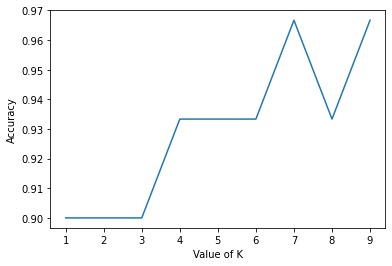

The best accuracy is 0.9666666666666667 comes with the value of K  = 7


In [11]:
plt.plot(range(1,K),avg_acc)
plt.xlabel("Value of K")
plt.ylabel("Accuracy")
plt.show()

print(f"The best accuracy is {avg_acc[6]} comes with the value of K  = {'7'}")

In [12]:
#BUILD MODEL AND TRAIN THE CLASSIFIER
K = 7
knn = KNeighborsClassifier(n_neighbors = K)
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=7, p=2,
                     weights='uniform')

In [13]:
#PREDICTION
y_hat = knn.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']
25        Iris-setosa
11        Iris-setosa
41        Iris-setosa
110    Iris-virginica
12        Iris-setosa
Name: iris, dtype: object


In [14]:
#EVALUATION CRITERIA
print("Accuracy score : %.2f" % metrics.accuracy_score(y_test,y_hat))

from sklearn.metrics import f1_score
print("F1 Score : %.2f" % f1_score(y_test,y_hat,average = 'weighted'))

Accuracy score : 0.97
F1 Score : 0.97


In [15]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_hat)
print(cm)

[[17  0  0]
 [ 0  6  0]
 [ 0  1  6]]


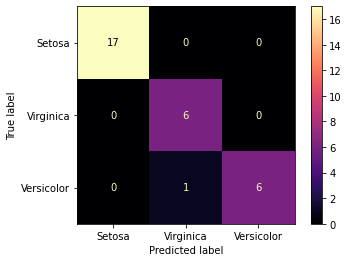

In [16]:
from sklearn.metrics import plot_confusion_matrix

pcm = plot_confusion_matrix(knn, X_test, y_test, display_labels = ['Setosa', 'Virginica', 'Versicolor'], cmap = plt.cm.magma)
print(pcm)

### **DECISION TREE**

In [17]:
#BUILD MODEL AND TRAIN THE THE CLASSIFIER
from sklearn.tree import DecisionTreeClassifier

des = DecisionTreeClassifier(criterion = 'entropy' , max_depth = 4)
des.fit(X_train,y_train)
des

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [18]:
#PREDICTION
y_hat = des.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']
25        Iris-setosa
11        Iris-setosa
41        Iris-setosa
110    Iris-virginica
12        Iris-setosa
Name: iris, dtype: object


In [19]:
#EVALUATION CRITERIA
print("Accuracy score : %.2f" % metrics.accuracy_score(y_test,y_hat))

from sklearn.metrics import f1_score
print("F1 Score : %.2f" % f1_score(y_test,y_hat,average = 'weighted'))

Accuracy score : 0.93
F1 Score : 0.93


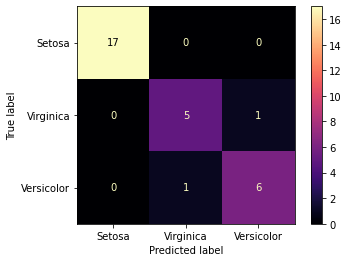

In [20]:
from sklearn.metrics import plot_confusion_matrix

pcm = plot_confusion_matrix(des, X_test, y_test, display_labels = ['Setosa', 'Virginica', 'Versicolor'], cmap = plt.cm.magma)
print(pcm)

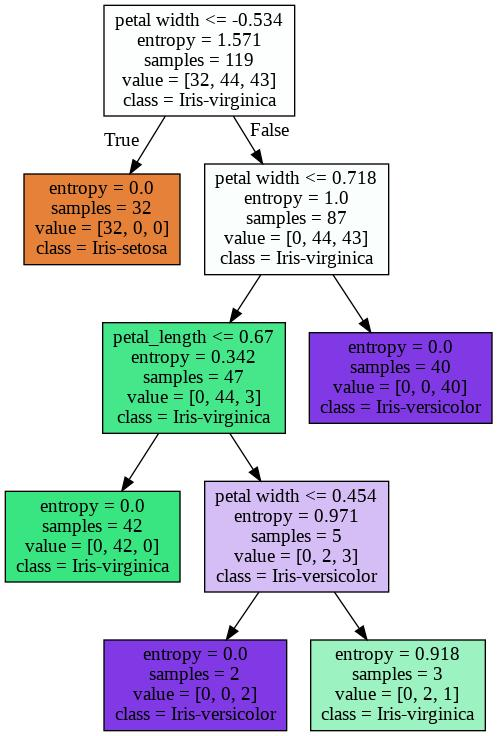

In [21]:
#PLOT THE DECISION TREE
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus as pdot
from IPython.display import Image

fn = df.columns[0:4]
cn = ['Iris-setosa','Iris-virginica','Iris-versicolor']

#EXPORT THE TREE INTO ODT FILE
tree.export_graphviz(des, feature_names = fn, class_names = cn, out_file = 'tree.odt', filled = True)

#READ THE CREATED FILE AND CONVERT IT INTO AN IMAGE FILE
graph = pdot.graphviz.graph_from_dot_file('tree.odt')
graph.write_jpg("Tree.png")

#RENDER THE PNG FILE
Image(filename = 'Tree.png')

### **LOGISTICS REGRESSION**

In [22]:
#BUILD MODEL AND TRAIN THE THE CLASSIFIER
from sklearn.linear_model import LogisticRegression

lg = LogisticRegression(C = 0.01, solver = 'liblinear')
lg.fit(X_train,y_train)
lg

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
#PREDICTION
y_hat = lg.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']
25        Iris-setosa
11        Iris-setosa
41        Iris-setosa
110    Iris-virginica
12        Iris-setosa
Name: iris, dtype: object


In [24]:
#EVALUATION CRITERIA
print("Accuracy score : %.2f" % metrics.accuracy_score(y_test,y_hat))

from sklearn.metrics import f1_score
print("F1 Score : %.2f" % f1_score(y_test,y_hat,average = 'weighted'))

Accuracy score : 0.83
F1 Score : 0.82


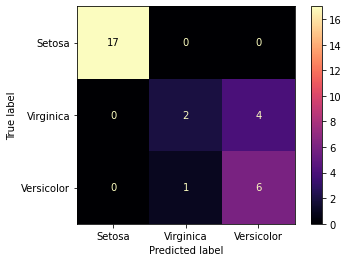

In [25]:
from sklearn.metrics import plot_confusion_matrix

pcm = plot_confusion_matrix(lg, X_test, y_test, display_labels = ['Setosa', 'Virginica', 'Versicolor'], cmap = plt.cm.magma)

print(pcm)

In [26]:
from sklearn.metrics import log_loss
prob = lg.predict_proba(X_test)
print("Log loss:",log_loss(y_test,prob))

Log loss: 0.8047505928852013


### **SVM**

In [27]:
#BUILD MODEL AND TRAIN THE THE CLASSIFIER
from sklearn import svm

clf = svm.SVC(kernel = 'linear')
clf.fit(X_train, y_train)
clf

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
#PREDICTION
y_hat = clf.predict(X_test)
print(y_hat[0:5])
print(y_test[0:5])

['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-virginica' 'Iris-setosa']
25        Iris-setosa
11        Iris-setosa
41        Iris-setosa
110    Iris-virginica
12        Iris-setosa
Name: iris, dtype: object


In [29]:
#EVALUATION CRITERIA
print("Accuracy score : %.2f" % metrics.accuracy_score(y_test,y_hat))

from sklearn.metrics import f1_score
print("F1 Score : %.2f" % f1_score(y_test,y_hat,average = 'weighted'))

Accuracy score : 0.97
F1 Score : 0.97


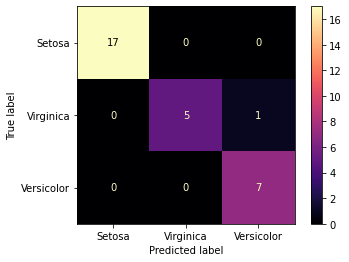

In [30]:
from sklearn.metrics import plot_confusion_matrix

pcm = plot_confusion_matrix(clf, X_test, y_test, display_labels = ['Setosa', 'Virginica', 'Versicolor'], cmap = plt.cm.magma)

print(pcm)

### **SUMMARY OF THE CLASSIFICATION TECHNIQUES**

| Algorithm            | Accuracy | F1-Score  |
|----------------------|----------|-----------|
|  KNN                 |   0.97   |  0.97     |
|  Decision Tree       |   0.93   |  0.93     |
|  Logistic Regression |   0.83   |  0.82     | 
|  SVM                 |   0.97   |  0.97     |